In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#读⼊数据 
# data = np.recfromcsv('../films.csv',encoding='UTF-8') 
df = pd.read_csv('../films.csv')

In [3]:
data = df.copy()

In [4]:
data = data.drop(labels='Title',axis=1)

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

features = ['Category']
for feature in features:  
    #非数字型和数字型标签值标准化
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])
data['Category']

0      2
1      2
2      6
3     24
4      4
5     25
6     28
7     19
8      2
9      0
10    21
11    12
12    20
13    23
14     9
15     7
16     1
17     8
18    15
19     2
20    27
21    10
22    18
23    11
24    14
25     3
26     2
27    26
28     2
29    29
30    29
31    16
32    22
33     2
34     2
35    30
36     2
37    17
38    13
39     5
40     2
41    29
42     2
43    31
44    29
45    31
46    31
Name: Category, dtype: int32

In [6]:
data

,Category,Rank,Time,Box Office
0,2,6.9,102,1400
1,2,8.6,131,5702
2,6,9.2,176,561900
3,24,7.3,144,6339
4,4,9.2,137,966
5,25,8.6,136,3248
6,28,7.8,156,24100
7,19,9.3,123,2514
8,2,9.5,158,147000
9,0,8.6,164,34700


In [7]:
from sklearn import preprocessing

X_scale = data.values[:,1]
scaler = preprocessing.StandardScaler().fit(X_scale.reshape(-1,1))
X_scaled = scaler.transform(X_scale.reshape(-1,1))
X_scaled_csv = pd.Series(X_scaled.reshape(1,-1)[0])
    # 将其重新格式化以导出到Kaggle
data['Box Office'] = pd.Series(X_scaled.reshape(1, -1)[0])

In [8]:
data

,Category,Rank,Time,Box Office
0,2,6.9,102,0.635593
1,2,8.6,131,1.030184
2,6,9.2,176,1.169451
3,24,7.3,144,0.728438
4,4,9.2,137,1.169451
5,25,8.6,136,1.030184
6,28,7.8,156,0.844494
7,19,9.3,123,1.192663
8,2,9.5,158,1.239085
9,0,8.6,164,1.030184


In [9]:
data['Rank'].mean()

4.1617021276595745

In [11]:
data['Rank'] = [4.2 if x < 0.1 else x for x in data['Rank'] ]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    47 non-null     int32  
 1   Rank        47 non-null     float64
 2   Time        47 non-null     int64  
 3   Box Office  47 non-null     float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 1.4 KB


In [20]:
data.astype('float64')

,Category,Rank,Time,Box Office
0,2.0,6.9,102.0,0.635593
1,2.0,8.6,131.0,1.030184
2,6.0,9.2,176.0,1.169451
3,24.0,7.3,144.0,0.728438
4,4.0,9.2,137.0,1.169451
5,25.0,8.6,136.0,1.030184
6,28.0,7.8,156.0,0.844494
7,19.0,9.3,123.0,1.192663
8,2.0,9.5,158.0,1.239085
9,0.0,8.6,164.0,1.030184


In [22]:
data['Time'] = data['Time']/60

In [23]:
data

,Category,Rank,Time,Box Office
0,2,6.9,1.700000,0.635593
1,2,8.6,2.183333,1.030184
2,6,9.2,2.933333,1.169451
3,24,7.3,2.400000,0.728438
4,4,9.2,2.283333,1.169451
5,25,8.6,2.266667,1.030184
6,28,7.8,2.600000,0.844494
7,19,9.3,2.050000,1.192663
8,2,9.5,2.633333,1.239085
9,0,8.6,2.733333,1.030184


In [26]:
data2 = data.copy()

In [27]:
data2 = data2.values

In [30]:
data2.shape

(47, 4)

In [38]:
y_data=data2[:,-1] # 票房
x1_data= data2[:,-2] # 时长
x2_data = data2[:,-3] # 评分
x3_data =  data2[:,-4] #类型

In [71]:
y_data=data2[:,-1] # 票房
x1_data= data2[:,-2] # 时长
x2_data = data2[:,-3] # 评分
x3_data =  data2[:,-4] #类型
x_data = data2[:,1:3] 

In [72]:
x_data

array([[6.9       , 1.7       ],
       [8.6       , 2.18333333],
       [9.2       , 2.93333333],
       [7.3       , 2.4       ],
       [9.2       , 2.28333333],
       [8.6       , 2.26666667],
       [7.8       , 2.6       ],
       [9.3       , 2.05      ],
       [9.5       , 2.63333333],
       [8.6       , 2.73333333],
       [4.2       , 1.35      ],
       [9.        , 1.66666667],
       [4.2       , 1.75      ],
       [4.2       , 2.05      ],
       [5.8       , 2.03333333],
       [9.4       , 1.85      ],
       [4.2       , 2.13333333],
       [9.4       , 1.9       ],
       [8.9       , 1.78333333],
       [7.5       , 2.11666667],
       [4.2       , 1.68333333],
       [4.2       , 1.43333333],
       [9.2       , 1.56666667],
       [4.2       , 1.6       ],
       [9.        , 1.4       ],
       [4.2       , 1.98333333],
       [4.2       , 1.58333333],
       [4.2       , 1.6       ],
       [4.2       , 1.5       ],
       [9.6       , 1.63333333],
       [9.

In [44]:
#创建模型并拟合模型 
model=LinearRegression()

In [56]:
y_data.reshape(-1, 1).shape

(47, 1)

In [62]:
y_data.shape

(47,)

In [74]:
model.fit(x_data, y_data) 
print(model)

LinearRegression()


In [75]:
#打印系数,有⼏个⾃变量打印出来就有⼏个系数 
print('系数：',model.coef_) 
#打印截距 
print('截距：',model.intercept_)

系数： [0.42848717 0.10363821]
截距： -2.8904435095847547


In [76]:
#测 试 
x_test=[[40,1]] 
predict=model.predict(x_test) 
print('预测值：',predict)

预测值： [14.35268142]


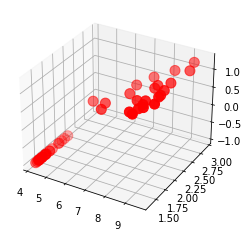

In [84]:
ax = plt.figure().add_subplot(111,projection='3d') 
ax.scatter(x_data[:,0],x_data[:,1],y_data,c='r',marker='o',s=100) 

#点为红⾊三⻆形
x0 = x_data[:,0]
x1 = x_data[:,1]

# #⽣成⽹格矩阵 
# x0,x1 = np.meshgrid(x0,x1) 
# z = model.intercept_ + x0*model.coef_[0] + x1*model.coef_[1]

# #画3D图 
# ax.plot_surface(x0,x1,z) 
# #设置坐标轴 
# ax.set_xlabel('Rank')
# ax.set_ylabel('Time')
# ax.set_zlabel('Box Office')

#显示图像 
plt.show()

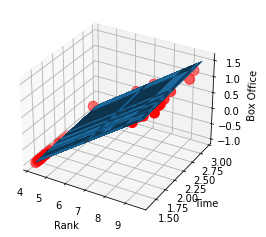

In [83]:
ax = plt.figure().add_subplot(111,projection='3d') 
ax.scatter(x_data[:,0],x_data[:,1],y_data,c='r',marker='o',s=100) 

#点为红⾊三⻆形
x0 = x_data[:,0]
x1 = x_data[:,1]

#⽣成⽹格矩阵 
x0,x1 = np.meshgrid(x0,x1) 
z = model.intercept_ + x0*model.coef_[0] + x1*model.coef_[1]

#画3D图 
ax.plot_surface(x0,x1,z) 
#设置坐标轴 
ax.set_xlabel('Rank')
ax.set_ylabel('Time')
ax.set_zlabel('Box Office')

#显示图像 
plt.show()